## Implement KNN algorithm for image recognition

In [663]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from IPython.core.debugger import Tracer
%matplotlib inline
#Setting how much we want to print from array
np.set_printoptions(threshold= 1000)

In [344]:
## Get One batch of CFAR 10 data set

def load_cfar10_batch(cifar10_dataset_folder_path, batch_id):
    """
    Load a batch of the dataset
    """
    with open(cifar10_dataset_folder_path + '/data_batch_' + str(batch_id), mode='rb') as file:
        batch = pickle.load(file)

    features = batch['data'].reshape((len(batch['data']), 3, 32, 32)).transpose(0, 2, 3, 1)
    labels = batch['labels']

    return features, labels

In [345]:
data = load_cfar10_batch('../Udacity/deep_learning/projects/image-classification/cifar-10-batches-py',
                 1)

In [346]:
labels = 'airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck'
labels_dict = dict(enumerate(labels))

In [347]:
#Showing image with axis
def show_img_label(index):
    print(labels_dict[data[1][index]])
    plt.axis('off')
    _ = plt.imshow(data[0][index])



truck


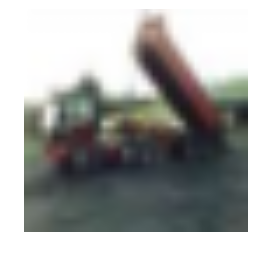

In [348]:
show_img_label(2)

In [708]:
def labels_looker(element):
        return labels_dict[element]

In [349]:
#Separating features from labels in data
features = data[0]
labels = data[1]

In [350]:
#Flattening features
features = features.reshape(10000, 32*32*3)

In [351]:
#One hot encoding labels
#image_cat = list(range(0,10))
#encoder = LabelBinarizer()
#encoder.fit(image_cat)
#labels = encoder.transform(labels)

In [710]:
class NearestNeighboor:
    def __init__(self, distance_type, train_features, train_labels, n_neighbors):
        self.type = distance_type
        self.train_features = np.array(train_features)
        self.train_labels = np.array(train_labels)
        self.dict_distances = {"L1": self.get_distance_L1, "L2": self.get_distance_L2}
        self.n_neighbors = n_neighbors
    
    def get_distance_L1(self, image, data):
        return np.abs(image - data)
    
    def get_distance_L2(self, image, data):
        return np.sqrt(np.sum(np.square(image - data), axis=1))
    
    def get_smallest_diff_idx(self, data, n_neighbors):
        ## Gets the number of nearest neighbors accordin to 
        ## desired number
        return np.argsort(data)[: n_neighbors]
    
    def get_predictions(self, test_features):
        ## Gets predictions given a set of test features and
        ## the training data
        predictions = []
        for i in range(len(test_features)):
            difference = self.dict_distances[self.type](test_features[i], self.train_features)
            min_idx = np.array(self.get_smallest_diff_idx(difference, self.n_neighbors))
            pred = self.train_labels[min_idx]
            ## Get labels predicted with each of their counts
            num, counts = np.unique(pred, return_counts=True)
            ## Check which label has the biggest counts (gets predicted most frequently)
            top = num[np.argwhere(counts == np.amax(counts))].flatten()
            # In cese there are ties, choose randomly
            if len(top) > 1:
                pred_label = np.asscalar(np.random.choice(counts, 1))
            else:
                pred_label = np.asscalar(top)
            predictions.append(pred_label)
        return np.array(predictions)
    
    def accuracy(self, test_features, test_labels):
        return np.mean(test_labels == self.get_predictions(test_features))
        
    

In [711]:
# Splitting training and testing 
train_features, test_features, train_labels, test_labels = train_test_split(features,
                                                                            labels, 
                                                                            test_size=0.30, 
                                                                            random_state=42)

In [712]:
find_nn = NearestNeighboor("L2", train_features, train_labels, 3)

In [716]:
find_nn.accuracy(test_features[0:100], test_labels[0:100])


0.14999999999999999